In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import sklearn
from sklearn.datasets import load_boston
import ipywidgets as widgets
import numpy as np
from matplotlib import cm
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split

In [5]:
x=np.linspace(-2.0, 2.0, 100)
y=np.linspace(-2.0, 2.0, 100)
X, Y=np.meshgrid(x, y)
f = lambda x, y: (np.sin((1/2)*x**2-(1/4)*y**2+3))*(np.cos(2*x+1-np.exp(y)))
Z = f(X,Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'lw'
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'lw', 'offset'
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'lw'
  if sys.path[0] == '':


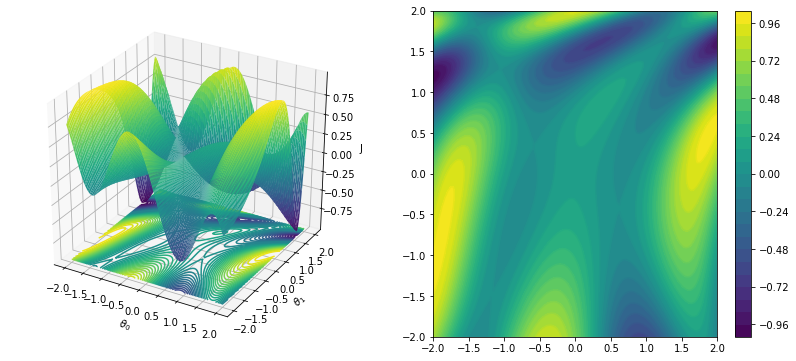

In [6]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(121, projection="3d")
ax.plot_surface(X, Y, Z, cmap=cm.viridis, rstride=1, cstride=1, alpha=1)
ax.contour(X, Y, Z, 40, lw=3, cmap=cm.viridis, linestyles="solid", offset=-1)
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("J")
#ax.set_zlim(0, 30)

ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z, 30, lw=3, cmap=cm.viridis, linestyles="solid", offset=-1)
c=ax2.contourf(X, Y, Z, 30, lw=3,cmap=cm.viridis)
fig.colorbar(c,)

plt.show()

In [11]:
Fdx = lambda x, y: np.cos(x**2/2 -y**2/4 +3)*x*np.cos(2*x+1-np.exp(y)) - np.sin(2*x+1-np.exp(y)*2*np.sin(x**2/2-y**2/4+3))
Fdy = lambda x, y: -np.cos(x**2/2-y**2/4+3)*y/2*np.cos(2*x+1-np.exp(y)) -np.sin(2*x+1-np.exp(y))*np.exp(y)*np.sin(x**2/2-y**2/4+3)

def gradD(x, y, alpha, fp_x, fp_y):
    return x - alpha*fp_x(x, y), y - alpha*fp_y(x, y)

def gradient_iteration(alpha, x_i, y_i, Fdx, Fdy, N):
    X = [x_i]
    Y = [y_i]
    for i in range(N):
        x_i, y_i = gradD(x_i, y_i, alpha, Fdx, Fdy)
        X.append(x_i)
        Y.append(y_i)
        if(abs(Fdx(x_i, y_i)) < 1e-4 and abs(Fdy(x_i, y_i))): #se verifica que tan cerca esta de cero
            break
    return X, Y, i

In [13]:
alpha = 0.007
x_i = 2.0 # x inicial
y_i = 2.0 # y inicial
N = 100 #numero de iteraciones
X, Y, i = gradient_iteration(alpha, x_i, y_i, Fdx, Fdy, N)
X_, Y_=np.meshgrid(X, Y)
Z = f(X_,Y_) 

print("el minimo de la funcion es: %f"%(f(X[-1], Y[-1])))

el minimo de la funcion es: 0.009728


Parte 2 tarea 3

In [14]:
def h(X, theta0, theta1):
    return theta0+theta1*X

def gradD(X, y, theta0, theta1, alpha, p):
    d_theta_0 = np.mean((h(X, theta0, theta1)-y)*abs(h(X, theta0, theta1)-y)**(p-2))
    d_theta_1 = np.mean((h(X, theta0, theta1)-y)*abs(h(X, theta0, theta1)-y)**(p-2)*X)
    return theta0 - alpha*d_theta_0, theta1 - alpha*d_theta_1

def gradient_iteration(X, y, theta0, theta1, alpha, p, N):
    for i in range(N):
        theta0, theta1 = gradD(X, y, theta0, theta1, alpha, p)
    return theta0, theta1

In [15]:
alpha = 0.7
p = 2
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
theta0_0 = 0.3
theta1_0 = 0.3
theta0, theta1 = gradient_iteration(X, y, theta0_0, theta1_0, alpha, p, 100)
y_ = theta1*X + theta0

p0 = [theta1_0, theta0_0] #usando la libreria
popt, pcov = curve_fit(h, X, y, p0, method='lm')
print("theta0 con la libreria ", "%0.5f"%popt[1])
print( "theta0 con regresion lineal", "%0.5f"%theta0 )

print("theta1 con la libreria ", "%0.5f"%popt[0])
print( "theta1 con regresion lineal", "%0.5f"%theta1 )


theta0 con la libreria  0.19954
theta0 con regresion lineal 0.21001
theta1 con la libreria  0.21018
theta1 con regresion lineal 0.19987


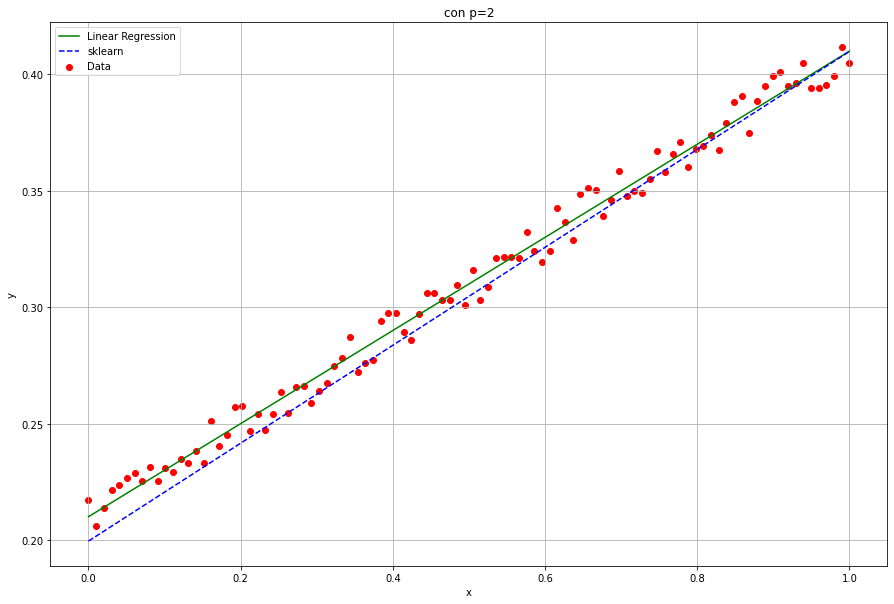

In [16]:
plt.figure(figsize=(15, 10))
plt.title("con p=2")
plt.scatter(X, y, color='r', label="Data")
plt.plot(X, y_, 'g-', label="Linear Regression")
plt.plot(X, X*popt[0] + popt[1], 'b--', label="sklearn")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)

theta0 con la libreria  0.19853
theta0 con regresion lineal 0.19862
theta1 con la libreria  0.21066
theta1 con regresion lineal 0.23200


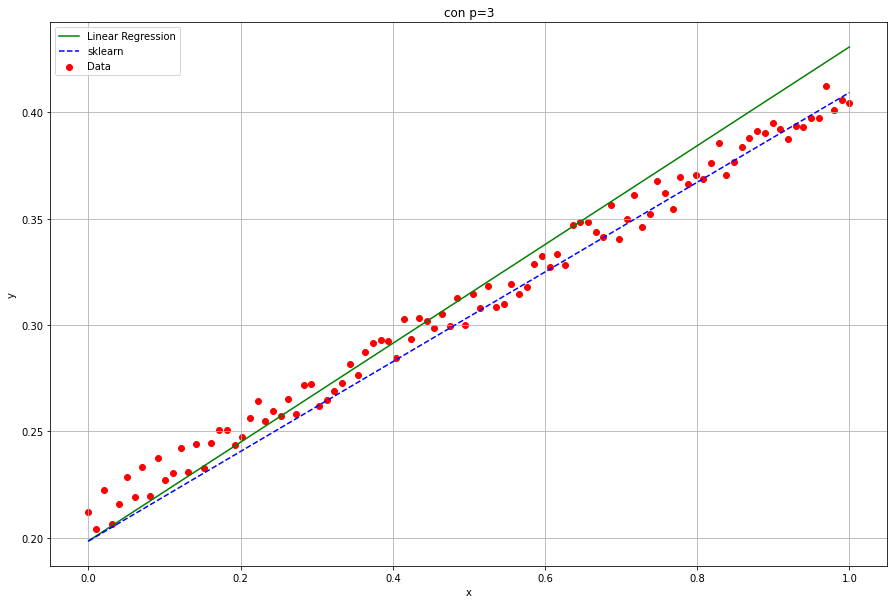

In [17]:
alpha = 0.7
p = 3
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
theta0_0 = 0.3
theta1_0 = 0.3
theta0, theta1 = gradient_iteration(X, y, theta0_0, theta1_0, alpha, p, 100)
y_ = theta1*X + theta0

p0 = [theta1_0, theta0_0] #usando la libreria
popt, pcov = curve_fit(h, X, y, p0, method='lm')
print("theta0 con la libreria ", "%0.5f"%popt[1])
print( "theta0 con regresion lineal", "%0.5f"%theta0 )

print("theta1 con la libreria ", "%0.5f"%popt[0])
print( "theta1 con regresion lineal", "%0.5f"%theta1 )
plt.figure(figsize=(15, 10))
plt.title("con p=3")
plt.scatter(X, y, color='r', label="Data")
plt.plot(X, y_, 'g-', label="Linear Regression")
plt.plot(X, X*popt[0] + popt[1], 'b--', label="sklearn")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)


curvas de aprendizaje

In [18]:
def get_K_divs(X_t, y, K, test_size_):
    divs = []
    for i in range(K):
        X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size = test_size_,  
                                                    random_state=None)
        divs.append({"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test})
    return divs

def score(y, y_predicted):
    R_square = r2_score(y, y_predicted) 
    return R_square

def score(y, y_predicted):
    R_square = r2_score(y, y_predicted) 
    return R_square

def learning_curve(X_t, y, K, test_size_, alpha, p, theta_0, theta_1):
    #obtenemos las divisiones
    divs = get_K_divs(X_t, y, K, test_size_)
    #print(divs)
    #para almanecenar la media y std
    training_score = []
    training_score_std = []
    test_score = []
    test_score_std = []
    test_score = []
    #hacemos los splits
    #como minimo deben haber dos pares, y como máximo, el tamaño de todo el arreglo
    for split in range(2, X_t.shape[0]):
        #valores para promediar
        sub_training_score = np.array([])
        sub_test_score = np.array([])
        for div in divs:             
            #hacemos una selección, el split representa el indice hasta donde
            X_train = div["X_train"][0:split]
            y_train = div["y_train"][0:split]            
            X_test = div["X_test"]
            y_test = div["y_test"]
            #en algunos casos, hay valores de una sola clase, lanza error
            if(len(np.unique(y_train)) == 1):
                continue
            theta_0_, theta_1_ = gradient_iteration(X_train, y_train, theta_0, theta_1, alpha, p, len(X_train))
            y_X = lambda x: theta_0_ + theta_1_*x 
            #calculamos los score
            sub_training_score = np.append(sub_training_score, score(y_train, y_X(X_train)))
            sub_test_score = np.append(sub_test_score, score(y_test, y_X(X_test)))
        training_score.append(np.mean(sub_training_score))
        training_score_std.append(np.std(sub_training_score))
        
        test_score.append(np.mean(sub_test_score))
        test_score_std.append(np.std(sub_test_score))
    train_size = np.arange(2, X_t.shape[0], 1)
    return train_size, np.array(training_score), np.array(training_score_std), np.array(test_score), np.array(test_score_std)
    #for train_index, test_index in cv.split(X_t):
     #   print(train_index, test_index)

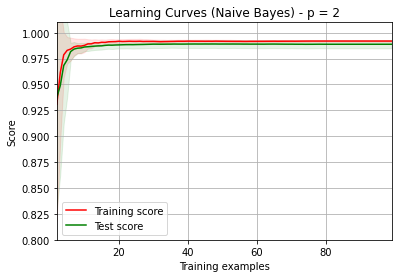

In [19]:
alpha = 0.7
p = 2
N = 100
theta0_0 = 0.14
theta1_0 = 0.14
X = np.linspace(0, 1, N)
y = 0.2 + 0.2*X + 0.02*np.random.random(N)
train_size, training_score, training_score_std, test_score, test_score_std = learning_curve(X, y, 20, 0.2, alpha, p, theta0_0, theta1_0)

plt.plot(train_size, training_score, 'r', label="Training score")
plt.fill_between(
        train_size,
        training_score - training_score_std,
        training_score + training_score_std,
        alpha=0.1,
        color="r",
    )
plt.plot(train_size, test_score,'g', label="Test score")
plt.fill_between(
        train_size,
        test_score - test_score_std,
        test_score + test_score_std,
        alpha=0.1,
        color="g",
    )
plt.title(u"Learning Curves (Naive Bayes) - p = 2")
plt.ylabel("Score")
plt.xlabel("Training examples")
plt.ylim(0.8, 1.01)
plt.xlim(train_size.min(), train_size.max())
plt.grid()
plt.legend(loc=0)




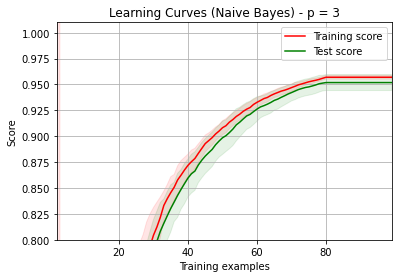

In [21]:
p = 3
X = np.linspace(0, 1, N)
y = 0.2 + 0.2*X + 0.02*np.random.random(N)
train_size, training_score, training_score_std, test_score, test_score_std = learning_curve(X, y, 10, 0.2, alpha, p, theta0_0, theta1_0)

plt.plot(train_size, training_score, 'r', label="Training score")
plt.fill_between(
        train_size,#sombra
        training_score - training_score_std,
        training_score + training_score_std,
        alpha=0.1,
        color="r",
    )
plt.plot(train_size, test_score,'g', label="Test score")
plt.fill_between(
        train_size,
        test_score - test_score_std,
        test_score + test_score_std,
        alpha=0.1,
        color="g",
    )
plt.title(u"Learning Curves (Naive Bayes) - p = 3")
plt.ylabel("Score")
plt.xlabel("Training examples")
plt.ylim(0.8, 1.01)
plt.xlim(train_size.min(), train_size.max())
plt.grid()
plt.legend(loc=0)

con p=2 tenemos una mejor regresion lineal y según sea la p varian la cantidad de datos necesarios